In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Use the citipy module to determine city based on latitude and longit
from citipy import citipy

In [4]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.i
coordinates = list(lat_lngs)

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    if city not in cities:
        cities.append(city)
        
len(cities)

625

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [25]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | byron bay
Processing Record 3 of Set 1 | waipawa
Processing Record 4 of Set 1 | libreville
Processing Record 5 of Set 1 | son la
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | hithadhoo
Processing Record 8 of Set 1 | saskylakh
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | hammerfest
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | wilhelmsburg
Processing Record 14 of Set 1 | north bend
Processing Record 15 of Set 1 | khromtau
Processing Record 16 of Set 1 | huambo
Processing Record 17 of Set 1 | upernavik
Processing Record 18 of Set 1 | longyearbyen
Processing Record 19 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | tsihombe
City not found. Skipping...
Processin

Processing Record 37 of Set 4 | rawlins
Processing Record 38 of Set 4 | east london
Processing Record 39 of Set 4 | mandalgovi
Processing Record 40 of Set 4 | abu dhabi
Processing Record 41 of Set 4 | cobh
Processing Record 42 of Set 4 | chik
Processing Record 43 of Set 4 | necochea
Processing Record 44 of Set 4 | emet
Processing Record 45 of Set 4 | paamiut
Processing Record 46 of Set 4 | ilulissat
Processing Record 47 of Set 4 | bara
Processing Record 48 of Set 4 | portland
Processing Record 49 of Set 4 | camocim
Processing Record 50 of Set 4 | hamilton
Processing Record 1 of Set 5 | gat
Processing Record 2 of Set 5 | ouadda
Processing Record 3 of Set 5 | cuenca
Processing Record 4 of Set 5 | filadelfia
Processing Record 5 of Set 5 | seoul
Processing Record 6 of Set 5 | panama city
Processing Record 7 of Set 5 | pisco
Processing Record 8 of Set 5 | shar
Processing Record 9 of Set 5 | quesnel
Processing Record 10 of Set 5 | faya
Processing Record 11 of Set 5 | lubbock
Processing Recor

Processing Record 29 of Set 8 | laguna
Processing Record 30 of Set 8 | san cristobal
Processing Record 31 of Set 8 | roma
Processing Record 32 of Set 8 | longjiang
Processing Record 33 of Set 8 | bogorodskoye
Processing Record 34 of Set 8 | bengkulu
Processing Record 35 of Set 8 | ahipara
Processing Record 36 of Set 8 | usinsk
Processing Record 37 of Set 8 | tidore
City not found. Skipping...
Processing Record 38 of Set 8 | mana
Processing Record 39 of Set 8 | peniche
Processing Record 40 of Set 8 | uige
Processing Record 41 of Set 8 | kumluca
Processing Record 42 of Set 8 | vanimo
Processing Record 43 of Set 8 | goderich
Processing Record 44 of Set 8 | ndioum
Processing Record 45 of Set 8 | lorengau
Processing Record 46 of Set 8 | provideniya
Processing Record 47 of Set 8 | jiddah
City not found. Skipping...
Processing Record 48 of Set 8 | lucea
Processing Record 49 of Set 8 | ambanja
Processing Record 50 of Set 8 | palmer
Processing Record 1 of Set 9 | sobolevo
Processing Record 2 of

Processing Record 18 of Set 12 | wajima
Processing Record 19 of Set 12 | kasra
City not found. Skipping...
Processing Record 20 of Set 12 | sungaipenuh
Processing Record 21 of Set 12 | north branch
Processing Record 22 of Set 12 | dingli
Processing Record 23 of Set 12 | pokosnoye
Processing Record 24 of Set 12 | kulgam
Processing Record 25 of Set 12 | vadso
Processing Record 26 of Set 12 | anan
Processing Record 27 of Set 12 | teeli
Processing Record 28 of Set 12 | chapais
Processing Record 29 of Set 12 | makakilo city
Processing Record 30 of Set 12 | mao
Processing Record 31 of Set 12 | sinop
Processing Record 32 of Set 12 | mpongwe
Processing Record 33 of Set 12 | aasiaat
Processing Record 34 of Set 12 | zvenigovo
Processing Record 35 of Set 12 | banda aceh
Processing Record 36 of Set 12 | kloulklubed
Processing Record 37 of Set 12 | karaul
City not found. Skipping...
Processing Record 38 of Set 12 | mapiripan
Processing Record 39 of Set 12 | ambulu
Processing Record 40 of Set 12 | p

In [12]:
len(city_data)

577

In [22]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,49.08,82,14,6.82,AU,2021-06-03 22:59:28
1,Byron Bay,-28.6500,153.6167,65.05,66,0,10.63,AU,2021-06-03 22:58:36
2,Waipawa,-41.4122,175.5153,56.03,72,59,5.48,NZ,2021-06-03 22:59:29
3,Libreville,0.3925,9.4537,80.62,89,20,9.22,GA,2021-06-03 22:59:29
4,Son La,21.3167,103.9000,71.96,94,100,1.97,VN,2021-06-03 22:59:29
5,Ushuaia,-54.8000,-68.3000,26.26,93,0,5.75,AR,2021-06-03 22:54:36
6,Hithadhoo,-0.6000,73.0833,83.55,70,100,18.19,MV,2021-06-03 22:59:30
7,Saskylakh,71.9167,114.0833,34.27,98,100,10.47,RU,2021-06-03 22:59:30
8,Butaritari,3.0707,172.7902,83.17,75,93,10.83,KI,2021-06-03 22:59:30
9,Albany,42.6001,-73.9662,71.10,81,97,8.72,US,2021-06-03 22:55:31


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

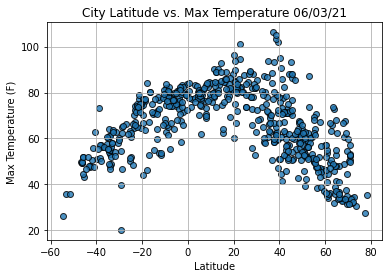

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

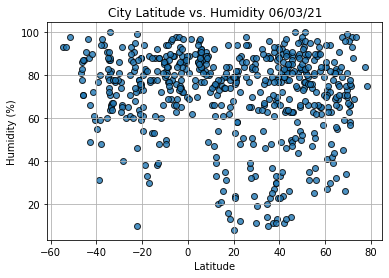

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

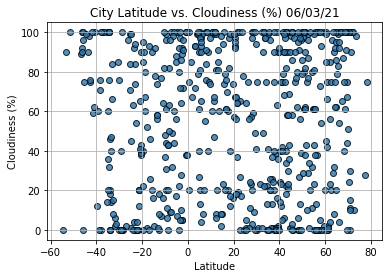

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

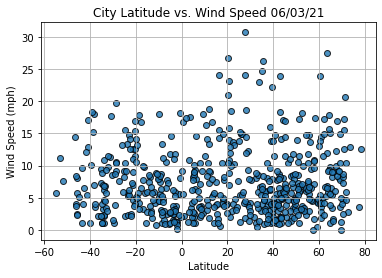

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [31]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [32]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

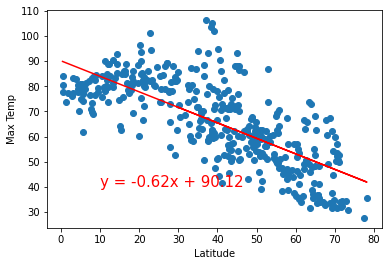

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

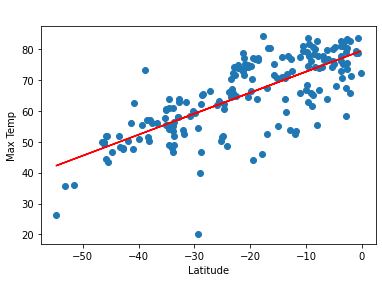

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

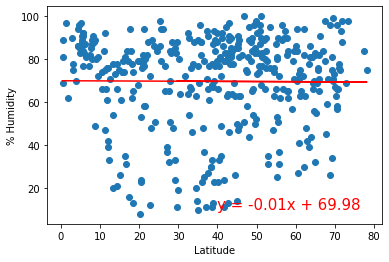

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

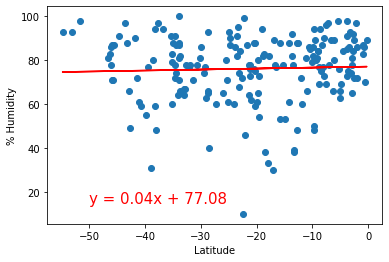

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

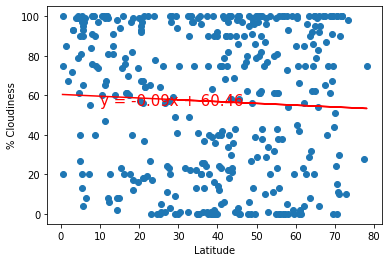

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

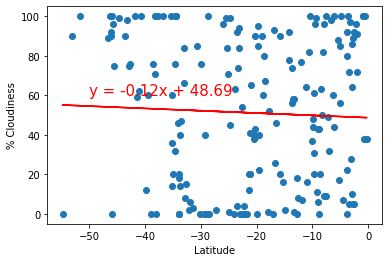

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

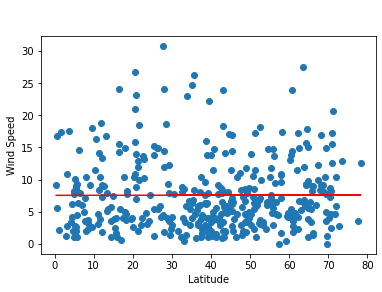

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

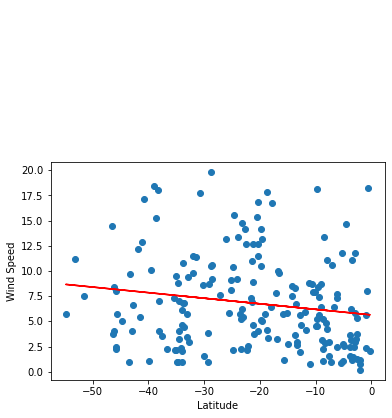

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))